## Analisa Penyebab Keterlambatan Pesawat

Di Notebook ini, kita akan menganalisis data penyebab keterlambatan pesawat berdasarkan waktu, bandara dan maskapai. Data yang diambil berasal dari Kaggle. kita akan mencoba menjawab dari bebebarap pertanyaan berikut:
<ul>
    <li>kontol</li>
<ul>

#### Import Libraries

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Data Preparation

In [10]:
df_airline_delay = pd.read_csv('Airline_Delay_Cause.csv')

In [11]:
df_airline_delay.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101315 entries, 0 to 101314
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 101315 non-null  int64  
 1   month                101315 non-null  int64  
 2   carrier              101315 non-null  object 
 3   carrier_name         101315 non-null  object 
 4   airport              101315 non-null  object 
 5   airport_name         101315 non-null  object 
 6   arr_flights          101157 non-null  float64
 7   arr_del15            100960 non-null  float64
 8   carrier_ct           101157 non-null  float64
 9   weather_ct           101157 non-null  float64
 10  nas_ct               101157 non-null  float64
 11  security_ct          101157 non-null  float64
 12  late_aircraft_ct     101157 non-null  float64
 13  arr_cancelled        101157 non-null  float64
 14  arr_diverted         101157 non-null  float64
 15  arr_delay        

### Informasi Pada Data

year = Tahun pada data diambil.
month = Bulan pada data diambil.
carrier = Kode Maskapai
carrier_name = Nama Maskapai.
airport = Kode Airport.
airport_name = Nama pada Airport.
arr_flight = Jumlah pada penerbangan yang tiba di Airport.
arr_del15 = Jumlah penerbangan yang terlambat lebih dari 15 menit.
carrier_ct = Jumlah penerbangan yang terlambat karena maskapai udara.
weather_ct = jumlah Penerbangan yang terlambat karena faktor cuaca.
nas_ct = jumlah penerbangan yang terlambat karena National Aviation System (Seperti trafik penerbangan yang tinggi).
security_ct = Jumlah penerbang yang terlambat karena melanggar keamanan.
late_aircraft_ct = Jumlah penerbangan yang terlambat karena penerbangan yang lain tertunda karena menggunakan pesawat yang sama.
arr_canceled = Jumlah penerbangan yang dibatalkan.
arr_diverted = Jumlah penerbangan yang dialihkan.
arr_delay = Total waktu (Menit) penerbangan yang terlambat.
carrier_delay = Total waktu (Menit) keterlambatan karena maskapai.
weather_delay = Total waktu (Menit) keterlambatan karena cuaca yang buruk.
nas_delay = Total waktu (Menit) keterlambatan karena National Aviation System.
security_delay = Total Waktu (Menit) Keterlambatan karena masalah keamanan.
late_aircraft_delay = Total waktu (Menit) keterlambatan karena penerbangan sebelumnya dipesawat 

In [15]:
pal = sns.color_palette()

Text(0.5, 0, 'Flights')

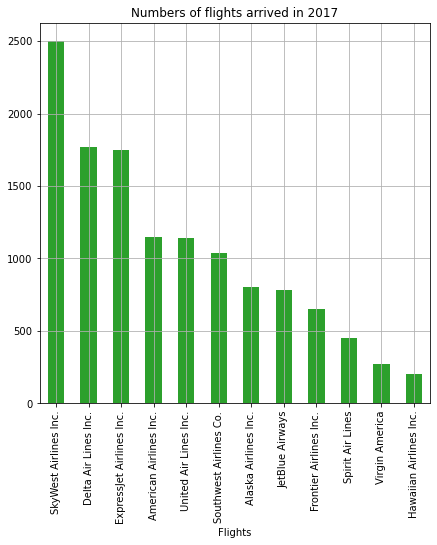

In [19]:
#Number of delays in 2017
fig, ax = plt.subplots(figsize=(7, 7))
df_airline_delay[df_airline_delay.year ==2017].carrier_name.value_counts().plot(kind='bar', grid=True, color=pal[2])
ax.set_title("Numbers of flights arrived in 2017")
ax.set_xlabel("Flights")

Text(0.5, 0, 'Flights')

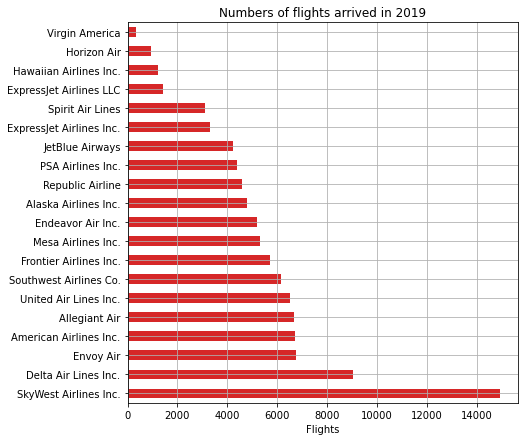

In [20]:
#Number of delays in 2019
fig, ax = plt.subplots(figsize=(7, 7))
df_airline_delay.carrier_name.value_counts().plot(kind='barh', grid=True,color=pal[3])
ax.set_title("Numbers of flights arrived in 2019")
ax.set_xlabel("Flights")